In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Load dataset
df = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")
print(df.shape)
df.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [46]:
# Encode categorical columns
cat_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [47]:
#Split X & y
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

#Split train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#   Decision Tree ( Entropy, Gini,  Information Gain)

Gini Accuracy: 0.782608695652174
Entropy Accuracy: 0.7989130434782609


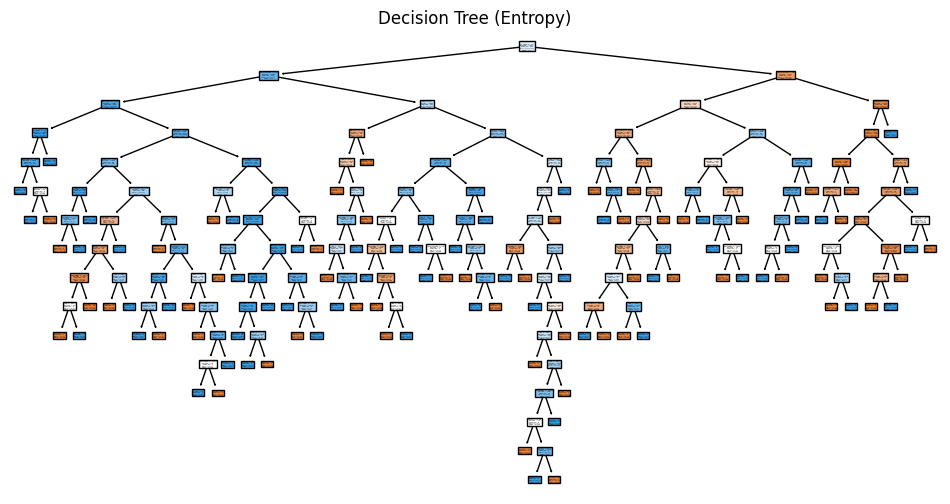

In [48]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Train with Gini
tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
tree_gini.fit(X_train, y_train)

# Train with Entropy (Information Gain)
tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_entropy.fit(X_train, y_train)

# Accuracy
print("Gini Accuracy:", accuracy_score(y_test, tree_gini.predict(X_test)))
print("Entropy Accuracy:", accuracy_score(y_test, tree_entropy.predict(X_test)))

# Visualization
plt.figure(figsize=(12,6))
plot_tree(tree_entropy, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.title("Decision Tree (Entropy)")
plt.show()


# Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Random Forest Accuracy:", accuracy_score(y_test, rf.predict(X_test)))


Random Forest Accuracy: 0.8804347826086957


# Ensemble Learning (Bagging, Boosting, Stacking)

In [50]:
# Bagging (with Decision Tree)
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)

print("Bagging Accuracy:", accuracy_score(y_test, bagging.predict(X_test)))

Bagging Accuracy: 0.8804347826086957


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [51]:
#Boosting
from sklearn.ensemble import AdaBoostClassifier

boosting = AdaBoostClassifier(n_estimators=50, random_state=42)
boosting.fit(X_train, y_train)

print("Boosting Accuracy:", accuracy_score(y_test, boosting.predict(X_test)))


Boosting Accuracy: 0.8532608695652174


In [52]:
#Stacking
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = [
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier())
]

stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking.fit(X_train, y_train)

print("Stacking Accuracy:", accuracy_score(y_test, stacking.predict(X_test)))


Stacking Accuracy: 0.8804347826086957


# Confusion Matrix

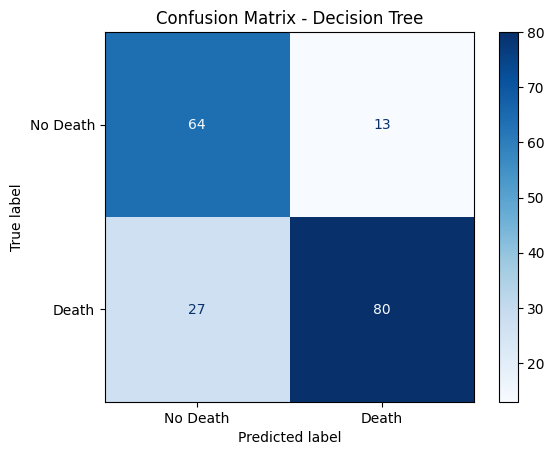

Classification Report - Decision Tree
              precision    recall  f1-score   support

        Down       0.70      0.83      0.76        77
        Flat       0.86      0.75      0.80       107

    accuracy                           0.78       184
   macro avg       0.78      0.79      0.78       184
weighted avg       0.79      0.78      0.78       184

------------------------------------------------------------


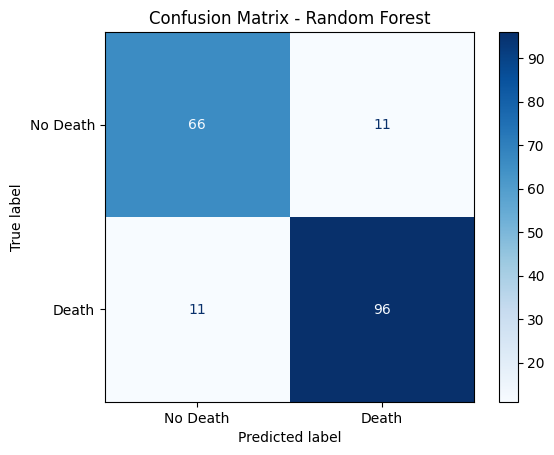

Classification Report - Random Forest
              precision    recall  f1-score   support

        Down       0.86      0.86      0.86        77
        Flat       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

------------------------------------------------------------


In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Dictionary to store models and their names
models = {
    "Decision Tree": dt,   # dt
    "Random Forest": rf    # rf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Death', 'Death'])
    
    # Plot
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    
    # Classification Report
    print(f"Classification Report - {name}")
    from sklearn.utils.multiclass import unique_labels
    labels = unique_labels(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names=[le.classes_[i] for i in labels]))
    print("-" * 60)

